Table of Contents:  
1. Import libraries and data.
2. Fundamental data quality and consistency checks.
3. Combine the customer dataset with the ords_prods_merge dataset.
4. Export the new dataframe.  

1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path
path = r'/Users/samlisik/Documents/Instacart Basket Analysis'

In [3]:
# Import the customer dataframe
customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'))

In [4]:
# Check the first few rows
customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [7]:
# Check how many rows the customer dataset has before consistency checks
customers.shape

(206209, 10)

In [6]:
# Rename dataframe columns for consistency
customers.rename(columns={
    'First Name': 'first_name',
    'Surnam': 'surname',
    'Gender': 'gender',
    'STATE': 'state',
    'Age': 'age',
    'date_joined': 'date_joined',
    'n_dependants': 'n_dependants',
    'fam_status': 'family_status',
    'income': 'income'
}, inplace=True)

In [8]:
# Drop unnecessary columns
customers.drop(columns=['first_name', 'surname'], inplace=True)

In [9]:
# Check the result
customers.head()

,user_id,gender,state,age,date_joined,n_dependants,family_status,income
0,26711,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Female,Maryland,26,1/1/2017,1,married,40374


2. Fundamental data quality and consistency checks

In [10]:
# Check for missing values in the customers dataframe
customers.isnull().sum()

user_id          0
gender           0
state            0
age              0
date_joined      0
n_dependants     0
family_status    0
income           0
dtype: int64

In [11]:
# Check for duplicate rows
customers.duplicated().sum()

np.int64(0)

In [12]:
# Check data types
customers.dtypes

user_id           int64
gender           object
state            object
age               int64
date_joined      object
n_dependants      int64
family_status    object
income            int64
dtype: object

In [13]:
# Convert 'date_joined' to datetime
customers['date_joined'] = pd.to_datetime(customers['date_joined'])

In [14]:
# Check data types
customers.dtypes

user_id                   int64
gender                   object
state                    object
age                       int64
date_joined      datetime64[ns]
n_dependants              int64
family_status            object
income                    int64
dtype: object

In [17]:
# Look for potential outliers
customers[['age', 'n_dependants', 'income']].describe()

,age,n_dependants,income
count,206209.000000,206209.000000,206209.000000
mean,49.501646,1.499823,94632.852548
std,18.480962,1.118433,42473.786988
min,18.000000,0.000000,25903.000000
25%,33.000000,0.000000,59874.000000
50%,49.000000,1.000000,93547.000000
75%,66.000000,3.000000,124244.000000
max,81.000000,3.000000,593901.000000


<Axes: ylabel='Frequency'>

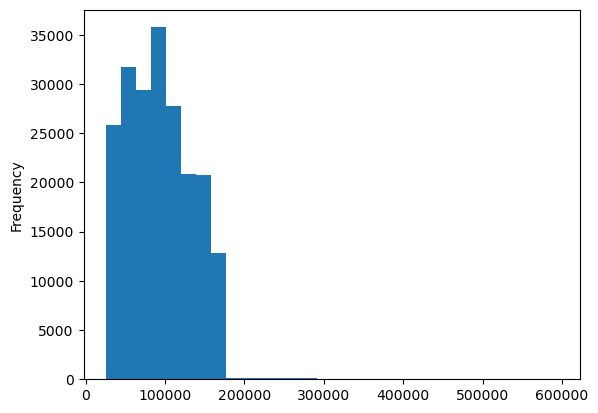

In [18]:
# Visualize 'income' using a histogram to see how skewed it is
customers['income'].plot.hist(bins=30)

Data quality and consistency checks - customer dataset

Number of rows before consistency checks: 206,209.  
Duplicates: none detected.  
Missing values: no missing values remain in the columns used for analysis.   
Data types: 
  - Integer columns: 'user_id', 'age', 'n_dependents, 'income' 
  - Object columns: 'gender', state', 'family_status', 'date_joined'
Data type adjustments: 'date_joined' converted from object to datetime for accurate time-based analysis.
Outliers / extreme values: 
  - 'age': min 18, max 81 - all values plausible.  
  - 'n_dependants': min 0, max 3 – all values plausible.  
  - 'income': min 25,903, max 593,901 – maximum income is substantially higher than the 75th percentile, indicating potential extreme values.
Mixed-type columns: none detected within numeric columns; object columns are consistent.  

Overall, the dataset is clean for analysis, with unnecessary columns removed and remaining columns consistent and ready for further work.

3. Combine the customer dataset with the ords_prods_merge dataset

In [21]:
# Load the ords_prods_merge dataframe
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_v3.pkl'))

In [22]:
# Check dtypes
ords_prods_merge['user_id'].dtype, customers['user_id'].dtype

(dtype('int64'), dtype('int64'))

In [23]:
# Combine the two datasets using merge() - left join
ords_prods_merge = ords_prods_merge.merge(customers, on='user_id', how='left')

In [24]:
# View the first few rows of the merged dataframe
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,...,busiest_day,busiest_days_v2,busiest_period_of_day,gender,state,age,date_joined,n_dependants,family_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Regularly busy,Regularly busy,Average orders,Female,Alabama,31,2019-02-17,3,married,40423
1,2539329,1,prior,1,2,8,NaN,14084,2,0,...,Regularly busy,Regularly busy,Average orders,Female,Alabama,31,2019-02-17,3,married,40423
2,2539329,1,prior,1,2,8,NaN,12427,3,0,...,Regularly busy,Regularly busy,Average orders,Female,Alabama,31,2019-02-17,3,married,40423
3,2539329,1,prior,1,2,8,NaN,26088,4,0,...,Regularly busy,Regularly busy,Average orders,Female,Alabama,31,2019-02-17,3,married,40423
4,2539329,1,prior,1,2,8,NaN,26405,5,0,...,Regularly busy,Regularly busy,Average orders,Female,Alabama,31,2019-02-17,3,married,40423


4. Export the new dataframe

In [25]:
# Save the merged dataframe with the name orders_products_all
orders_products_all = ords_prods_merge  # assign to the new variable

In [27]:
orders_products_all.shape

(32436241, 26)

In [26]:
# Export as a pickle file
orders_products_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))